In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [94]:
universe_df = pd.read_csv(r"C:\Users\WeeKe\Desktop\Stock_Universe.csv")


In [241]:
universe_df

,gvkey,iid,datadate,tic,trt1m,naics,sic
0,1000,01,30/09/1970,AE.2,NaN,NaN,3089.0
1,1000,01,31/10/1970,AE.2,6.3830,NaN,3089.0
2,1000,01,30/11/1970,AE.2,-28.0000,NaN,3089.0
3,1000,01,31/12/1970,AE.2,11.1111,NaN,3089.0
4,1000,01,31/01/1971,AE.2,-10.0000,NaN,3089.0
...,...,...,...,...,...,...,...
7560347,352257,01C,30/06/2022,HX.,-14.2857,212393.0,1400.0
7560348,352257,01C,31/07/2022,HX.,-8.3333,212393.0,1400.0
7560349,352257,01C,31/08/2022,HX.,38.1818,212393.0,1400.0
7560350,353444,90,31/07/2022,HLN,NaN,325412.0,2834.0


In [242]:
universe_df.drop(columns = ["gvkey", "iid"])

,datadate,tic,trt1m,naics,sic
0,30/09/1970,AE.2,NaN,NaN,3089.0
1,31/10/1970,AE.2,6.3830,NaN,3089.0
2,30/11/1970,AE.2,-28.0000,NaN,3089.0
3,31/12/1970,AE.2,11.1111,NaN,3089.0
4,31/01/1971,AE.2,-10.0000,NaN,3089.0
...,...,...,...,...,...
7560347,30/06/2022,HX.,-14.2857,212393.0,1400.0
7560348,31/07/2022,HX.,-8.3333,212393.0,1400.0
7560349,31/08/2022,HX.,38.1818,212393.0,1400.0
7560350,31/07/2022,HLN,NaN,325412.0,2834.0


In [243]:
universe_df["tic"].unique()

array(['AE.2', 'AMFD.', 'AAIC.1', ..., 'HXLTF', 'HX.', 'HLN'],
      dtype=object)

In [244]:
len(universe_df["tic"].unique())

56123

# Filtering Universe of Stocks

## Sin Stocks

In [245]:
sic_beverages = [2080, 2082, 2083, 2084, 2085] 
sic_smoke = [x for x in range(2100, 2200)]

naics_sin = [7132, 713210, 71329, 713290, 72112, 721120]
sic_sin = sic_beverages + sic_smoke

In [246]:
len(universe_df[universe_df["sic"].isin(sic_sin)].tic.unique())

198

In [247]:
len(universe_df[universe_df["naics"].isin(naics_sin)].tic.unique())

154

In [248]:
sin_stocks = universe_df[((universe_df["sic"].isin(sic_sin)) | (universe_df["naics"].isin(naics_sin)))]

In [249]:
sin_stocks

,gvkey,iid,datadate,tic,trt1m,naics,sic
65809,1320,01,30/09/1972,ALV.3,NaN,NaN,2080.0
65810,1320,01,31/10/1972,ALV.3,9.0498,NaN,2080.0
65811,1320,01,30/11/1972,ALV.3,-3.7344,NaN,2080.0
65812,1320,01,31/12/1972,ALV.3,7.3276,NaN,2080.0
65813,1320,01,31/01/1973,ALV.3,18.0723,NaN,2080.0
...,...,...,...,...,...,...,...
7560199,350910,01C,30/04/2022,RVLY.,-6.7073,713290.0,7990.0
7560200,350910,01C,31/05/2022,RVLY.,-5.8824,713290.0,7990.0
7560201,350910,01C,30/06/2022,RVLY.,-38.1944,713290.0,7990.0
7560202,350910,01C,31/07/2022,RVLY.,-3.3708,713290.0,7990.0


In [250]:
len(sin_stocks["tic"].unique())

352

In [251]:
# Changing to datetime format
sin_stocks["datadate"] = pd.to_datetime(sin_stocks["datadate"])
sin_stocks.head()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic
65809,1320,01,1972-09-30,ALV.3,NaN,NaN,2080.0
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0


In [252]:
# Transforming returns to decimal values
sin_stocks["monthly_decimal_returns"] = sin_stocks["trt1m"] / 100
sin_stocks

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
65809,1320,01,1972-09-30,ALV.3,NaN,NaN,2080.0,NaN
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0,0.090498
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0,-0.037344
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0,0.073276
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0,0.180723
...,...,...,...,...,...,...,...,...
7560199,350910,01C,2022-04-30,RVLY.,-6.7073,713290.0,7990.0,-0.067073
7560200,350910,01C,2022-05-31,RVLY.,-5.8824,713290.0,7990.0,-0.058824
7560201,350910,01C,2022-06-30,RVLY.,-38.1944,713290.0,7990.0,-0.381944
7560202,350910,01C,2022-07-31,RVLY.,-3.3708,713290.0,7990.0,-0.033708


## Removing Problematic Observations

In [253]:
sin_below1000 = sin_stocks[sin_stocks["monthly_decimal_returns"] <= 10]
sin_below1000

,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0,0.090498
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0,-0.037344
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0,0.073276
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0,0.180723
65814,1320,01,1973-02-28,ALV.3,-0.3401,NaN,2080.0,-0.003401
...,...,...,...,...,...,...,...,...
7560199,350910,01C,2022-04-30,RVLY.,-6.7073,713290.0,7990.0,-0.067073
7560200,350910,01C,2022-05-31,RVLY.,-5.8824,713290.0,7990.0,-0.058824
7560201,350910,01C,2022-06-30,RVLY.,-38.1944,713290.0,7990.0,-0.381944
7560202,350910,01C,2022-07-31,RVLY.,-3.3708,713290.0,7990.0,-0.033708


In [254]:
sin_stocks_below350 = sin_stocks[sin_stocks["monthly_decimal_returns"]< 3.5]
sin_stocks_below350

,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0,0.090498
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0,-0.037344
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0,0.073276
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0,0.180723
65814,1320,01,1973-02-28,ALV.3,-0.3401,NaN,2080.0,-0.003401
...,...,...,...,...,...,...,...,...
7560199,350910,01C,2022-04-30,RVLY.,-6.7073,713290.0,7990.0,-0.067073
7560200,350910,01C,2022-05-31,RVLY.,-5.8824,713290.0,7990.0,-0.058824
7560201,350910,01C,2022-06-30,RVLY.,-38.1944,713290.0,7990.0,-0.381944
7560202,350910,01C,2022-07-31,RVLY.,-3.3708,713290.0,7990.0,-0.033708


In [255]:
sin_pivot = sin_stocks_below350.pivot(index = "datadate", columns = "tic", values = "monthly_decimal_returns")
sin_pivot
sin_pivot.to_csv("sin_pivot.csv")

# Stimulant Stocks

In [256]:
sic_stim = [2095]
naics_stim = [311920]
stim_stocks = universe_df[((universe_df["sic"].isin(sic_stim)) | (universe_df["naics"].isin(naics_stim)))]

In [257]:
stim_stocks

,gvkey,iid,datadate,tic,trt1m,naics,sic
418941,3013,01,31/01/1962,CHF.,NaN,311920.0,2090.0
418942,3013,01,28/02/1962,CHF.,NaN,311920.0,2090.0
418943,3013,01,31/03/1962,CHF.,NaN,311920.0,2090.0
418944,3013,01,30/04/1962,CHF.,NaN,311920.0,2090.0
418945,3013,01,31/05/1962,CHF.,NaN,311920.0,2090.0
...,...,...,...,...,...,...,...
7380788,189655,01,31/12/2019,BKCT,NaN,311920.0,2090.0
7380789,189655,01,29/02/2020,BKCT,900.0,311920.0,2090.0
7380790,189655,01,30/04/2020,BKCT,0.0,311920.0,2090.0
7380791,189655,01,31/05/2020,BKCT,100.0,311920.0,2090.0


In [258]:
len(stim_stocks["tic"].unique())

25

In [259]:
# Changing to datetime format
stim_stocks["datadate"] = pd.to_datetime(stim_stocks["datadate"])
stim_stocks.head()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic
418941,3013,01,1962-01-31,CHF.,NaN,311920.0,2090.0
418942,3013,01,1962-02-28,CHF.,NaN,311920.0,2090.0
418943,3013,01,1962-03-31,CHF.,NaN,311920.0,2090.0
418944,3013,01,1962-04-30,CHF.,NaN,311920.0,2090.0
418945,3013,01,1962-05-31,CHF.,NaN,311920.0,2090.0


In [260]:
stim_stocks["monthly_decimal_returns"] = stim_stocks["trt1m"] / 100
stim_stocks

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
418941,3013,01,1962-01-31,CHF.,NaN,311920.0,2090.0,NaN
418942,3013,01,1962-02-28,CHF.,NaN,311920.0,2090.0,NaN
418943,3013,01,1962-03-31,CHF.,NaN,311920.0,2090.0,NaN
418944,3013,01,1962-04-30,CHF.,NaN,311920.0,2090.0,NaN
418945,3013,01,1962-05-31,CHF.,NaN,311920.0,2090.0,NaN
...,...,...,...,...,...,...,...,...
7380788,189655,01,2019-12-31,BKCT,NaN,311920.0,2090.0,NaN
7380789,189655,01,2020-02-29,BKCT,900.0,311920.0,2090.0,9.0
7380790,189655,01,2020-04-30,BKCT,0.0,311920.0,2090.0,0.0
7380791,189655,01,2020-05-31,BKCT,100.0,311920.0,2090.0,1.0


In [261]:
stim_stocks_below350 = stim_stocks[stim_stocks["monthly_decimal_returns"]< 3.5]
stim_stocks_below350.shape
# stim_stocks_below350.to_csv("stim_stocks.csv")

(3459, 8)

In [262]:
stim_below1000 = stim_stocks[stim_stocks["monthly_decimal_returns"] <= 10]
stim_below1000

,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
418988,3013,01,1965-12-31,CHF.,-0.2174,311920.0,2090.0,-0.002174
418989,3013,01,1966-01-31,CHF.,2.1978,311920.0,2090.0,0.021978
418990,3013,01,1966-02-28,CHF.,-2.1505,311920.0,2090.0,-0.021505
418991,3013,01,1966-03-31,CHF.,-5.7143,311920.0,2090.0,-0.057143
418992,3013,01,1966-04-30,CHF.,2.3530,311920.0,2090.0,0.023530
...,...,...,...,...,...,...,...,...
7380787,189655,01,2019-07-31,BKCT,16.6667,311920.0,2090.0,0.166667
7380789,189655,01,2020-02-29,BKCT,900.0000,311920.0,2090.0,9.000000
7380790,189655,01,2020-04-30,BKCT,0.0000,311920.0,2090.0,0.000000
7380791,189655,01,2020-05-31,BKCT,100.0000,311920.0,2090.0,1.000000


In [263]:
stim_pivot = stim_stocks_below350.pivot(index = "datadate", columns = "tic", values = "monthly_decimal_returns")
stim_pivot.to_csv("stim_pivot.csv")

# Checking Distributions

In [264]:
sin_stocks["stock_type"] = "Sin"
stim_stocks["stock_type"] = "Stimulant"
sin_stim_unfiltered= pd.concat([sin_stocks,stim_stocks], axis = 0)
sin_stim_unfiltered


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns,stock_type
65809,1320,01,1972-09-30,ALV.3,NaN,NaN,2080.0,NaN,Sin
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0,0.090498,Sin
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0,-0.037344,Sin
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0,0.073276,Sin
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0,0.180723,Sin
...,...,...,...,...,...,...,...,...,...
7380788,189655,01,2019-12-31,BKCT,NaN,311920.0,2090.0,NaN,Stimulant
7380789,189655,01,2020-02-29,BKCT,900.0000,311920.0,2090.0,9.000000,Stimulant
7380790,189655,01,2020-04-30,BKCT,0.0000,311920.0,2090.0,0.000000,Stimulant
7380791,189655,01,2020-05-31,BKCT,100.0000,311920.0,2090.0,1.000000,Stimulant


In [265]:
sin_below1000["stock_type"] = "Sin"
stim_below1000["stock_type"] = "Stimulant"
sin_stim_below1000 = pd.concat([sin_below1000,stim_below1000], axis = 0)
sin_stim_below1000


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns,stock_type
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0,0.090498,Sin
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0,-0.037344,Sin
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0,0.073276,Sin
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0,0.180723,Sin
65814,1320,01,1973-02-28,ALV.3,-0.3401,NaN,2080.0,-0.003401,Sin
...,...,...,...,...,...,...,...,...,...
7380787,189655,01,2019-07-31,BKCT,16.6667,311920.0,2090.0,0.166667,Stimulant
7380789,189655,01,2020-02-29,BKCT,900.0000,311920.0,2090.0,9.000000,Stimulant
7380790,189655,01,2020-04-30,BKCT,0.0000,311920.0,2090.0,0.000000,Stimulant
7380791,189655,01,2020-05-31,BKCT,100.0000,311920.0,2090.0,1.000000,Stimulant


In [266]:
sin_stocks_below350["stock_type"] = "Sin"
stim_stocks_below350["stock_type"] = "Stimulant"
sin_stim_below350 = pd.concat([sin_stocks_below350,stim_stocks_below350], axis = 0)
sin_stim_below350

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns,stock_type
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0,0.090498,Sin
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0,-0.037344,Sin
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0,0.073276,Sin
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0,0.180723,Sin
65814,1320,01,1973-02-28,ALV.3,-0.3401,NaN,2080.0,-0.003401,Sin
...,...,...,...,...,...,...,...,...,...
7380786,189655,01,2019-06-30,BKCT,-25.0000,311920.0,2090.0,-0.250000,Stimulant
7380787,189655,01,2019-07-31,BKCT,16.6667,311920.0,2090.0,0.166667,Stimulant
7380790,189655,01,2020-04-30,BKCT,0.0000,311920.0,2090.0,0.000000,Stimulant
7380791,189655,01,2020-05-31,BKCT,100.0000,311920.0,2090.0,1.000000,Stimulant


# Boxplots 

- All returns > 1000% are removed

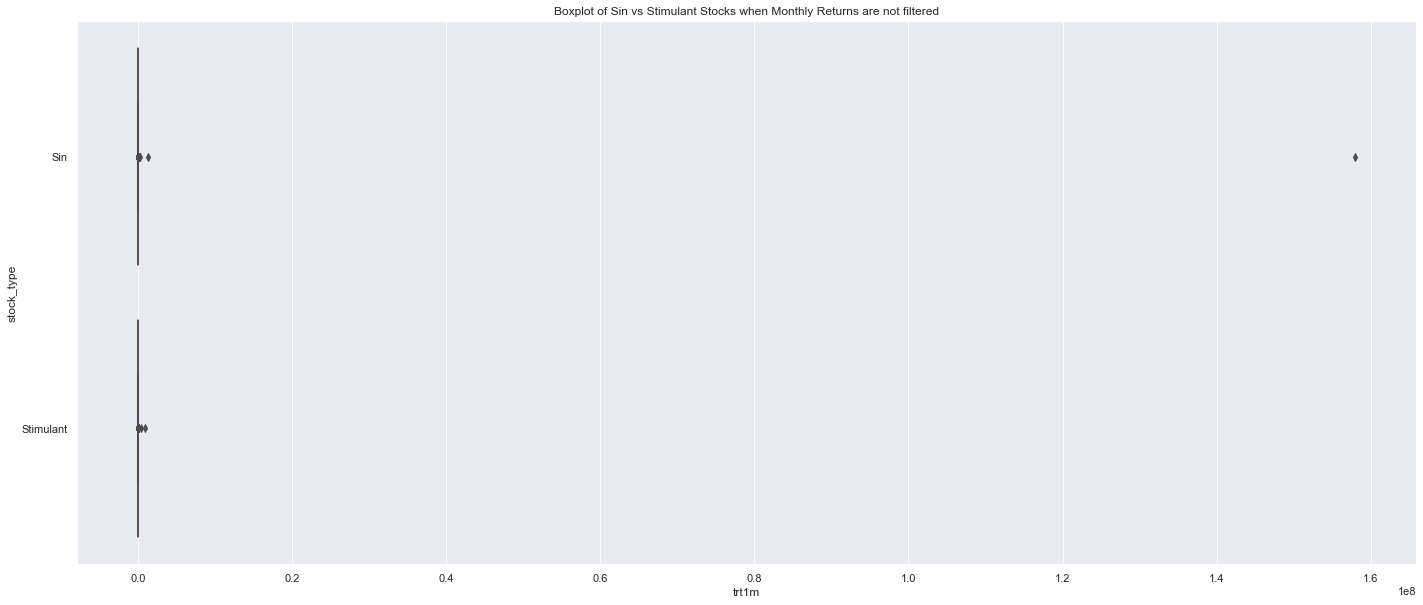

In [267]:
sns.boxplot(data = sin_stim_unfiltered, x = "trt1m", y = "stock_type").set(title = "Boxplot of Sin vs Stimulant Stocks when Monthly Returns are not filtered")
sns.set(rc={'figure.figsize':(24, 10)})


[Text(0.5, 1.0, 'Boxplot of Sin vs Stimulant Stocks when Monthly Returns > 1000% are removed')]

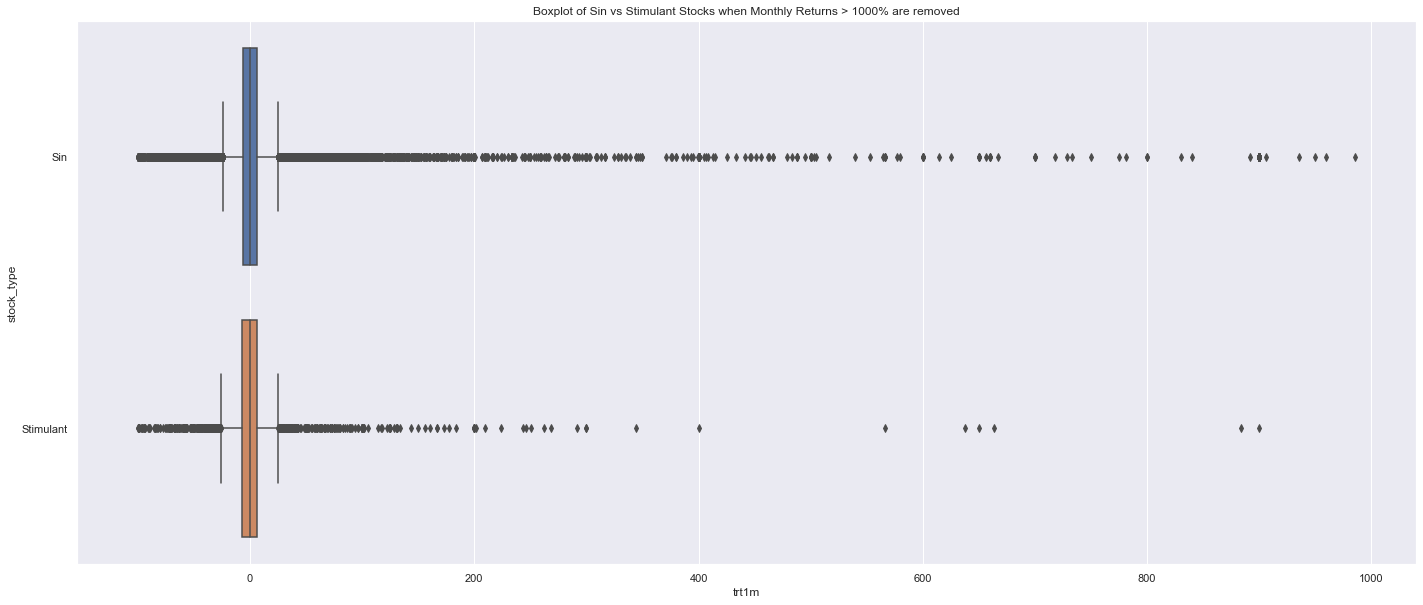

In [268]:
sns.boxplot(data = sin_stim_below1000, x = "trt1m", y = "stock_type").set(title = "Boxplot of Sin vs Stimulant Stocks when Monthly Returns > 1000% are removed")


[Text(0.5, 1.0, 'Boxplot of Sin vs Stimulant Stocks when Monthly Returns > 350% are removed')]

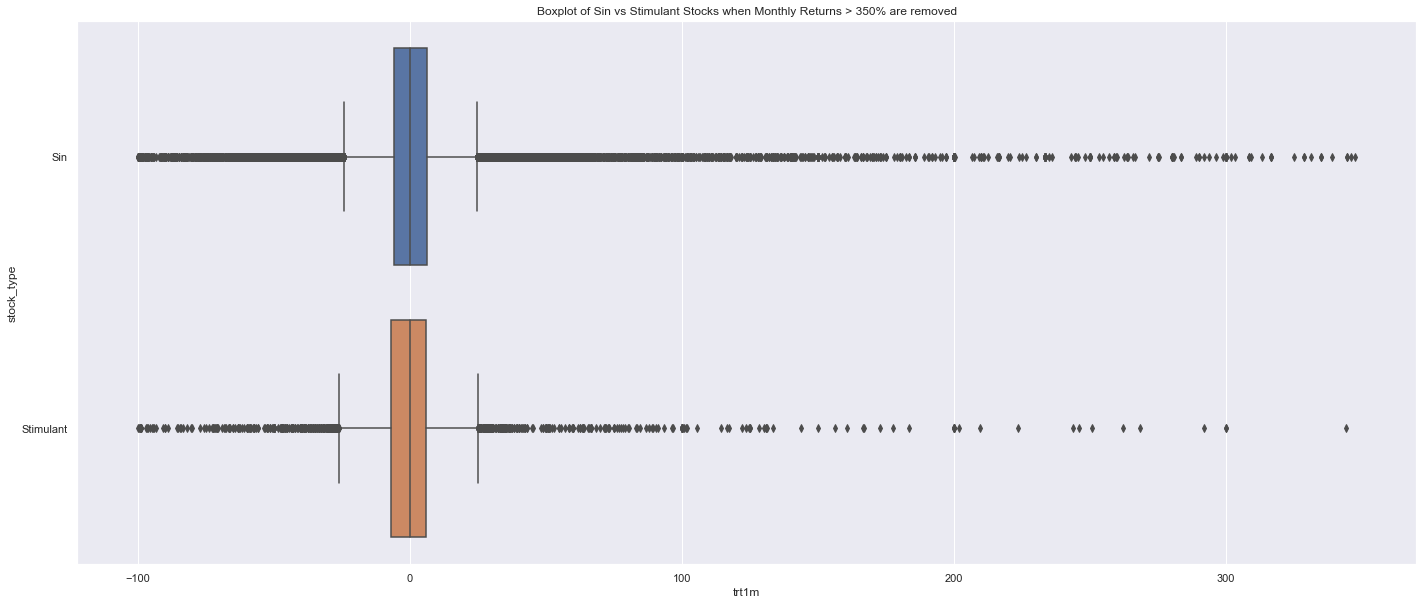

In [269]:
sns.boxplot(data = sin_stim_below350, x = "trt1m", y = "stock_type").set(title = "Boxplot of Sin vs Stimulant Stocks when Monthly Returns > 350% are removed")


## Histograms
- All returns > 350% are removed

Bins:
1. Negatives: -100--90, -90-80 increments of 10%
2. Positives: 0-10, 10-20, ..., 90-100, 100-200, 200-300, 300-400, ... 1000, 1000-infty 

In [270]:
sin_stim_below350

,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns,stock_type
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0,0.090498,Sin
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0,-0.037344,Sin
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0,0.073276,Sin
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0,0.180723,Sin
65814,1320,01,1973-02-28,ALV.3,-0.3401,NaN,2080.0,-0.003401,Sin
...,...,...,...,...,...,...,...,...,...
7380786,189655,01,2019-06-30,BKCT,-25.0000,311920.0,2090.0,-0.250000,Stimulant
7380787,189655,01,2019-07-31,BKCT,16.6667,311920.0,2090.0,0.166667,Stimulant
7380790,189655,01,2020-04-30,BKCT,0.0000,311920.0,2090.0,0.000000,Stimulant
7380791,189655,01,2020-05-31,BKCT,100.0000,311920.0,2090.0,1.000000,Stimulant


In [271]:
sin_stim_below350.describe()

,gvkey,trt1m,naics,sic,monthly_decimal_returns
count,61330.000000,61330.000000,58805.000000,61330.000000,61330.000000
mean,57269.714707,1.242363,446861.571108,4431.331322,0.012424
std,71336.947555,25.211191,233949.869313,2886.825103,0.252112
min,1320.000000,-99.995600,312.000000,2080.000000,-0.999956
25%,7432.000000,-6.040300,312120.000000,2082.000000,-0.060403
50%,25079.000000,0.000000,312140.000000,2100.000000,0.000000
75%,101130.000000,6.186575,713290.000000,7990.000000,0.061866
max,350910.000000,347.500000,721120.000000,9995.000000,3.475000


In [272]:
above_1000 = sin_stim_unfiltered[sin_stim_unfiltered["trt1m"] >= 1000]
# plt.hist(above_1000["trt1m"], bins = range(int(above_1000["trt1m"].min()), int(above_1000["trt1m"].max()), 1000))
# above_1000.describe()["trt1m"].to_csv("above_1k_summary.csv")


([<matplotlib.axis.XTick at 0x16d6f994d88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

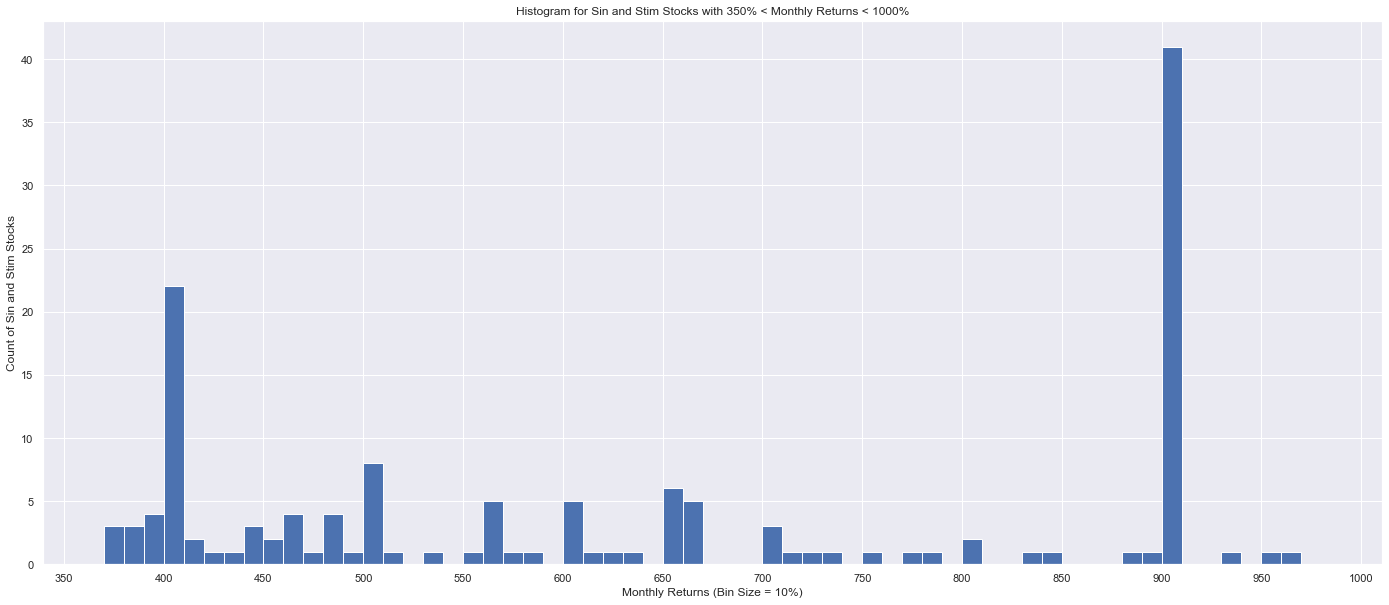

In [273]:
range_350 = sin_stim_unfiltered[(sin_stim_unfiltered["trt1m"] > 350) & (sin_stim_unfiltered["trt1m"] < 1000)]
plt.hist(range_350["trt1m"], bins = range(int(range_350["trt1m"].min()), int(range_350["trt1m"].max()), 10))
plt.title("Histogram for Sin and Stim Stocks with 350% < Monthly Returns < 1000%")
plt.xlabel("Monthly Returns (Bin Size = 10%)")
plt.ylabel("Count of Sin and Stim Stocks")
plt.xticks([x for x in range(350, 1050,50)])

([<matplotlib.axis.XTick at 0x16d6fb400c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

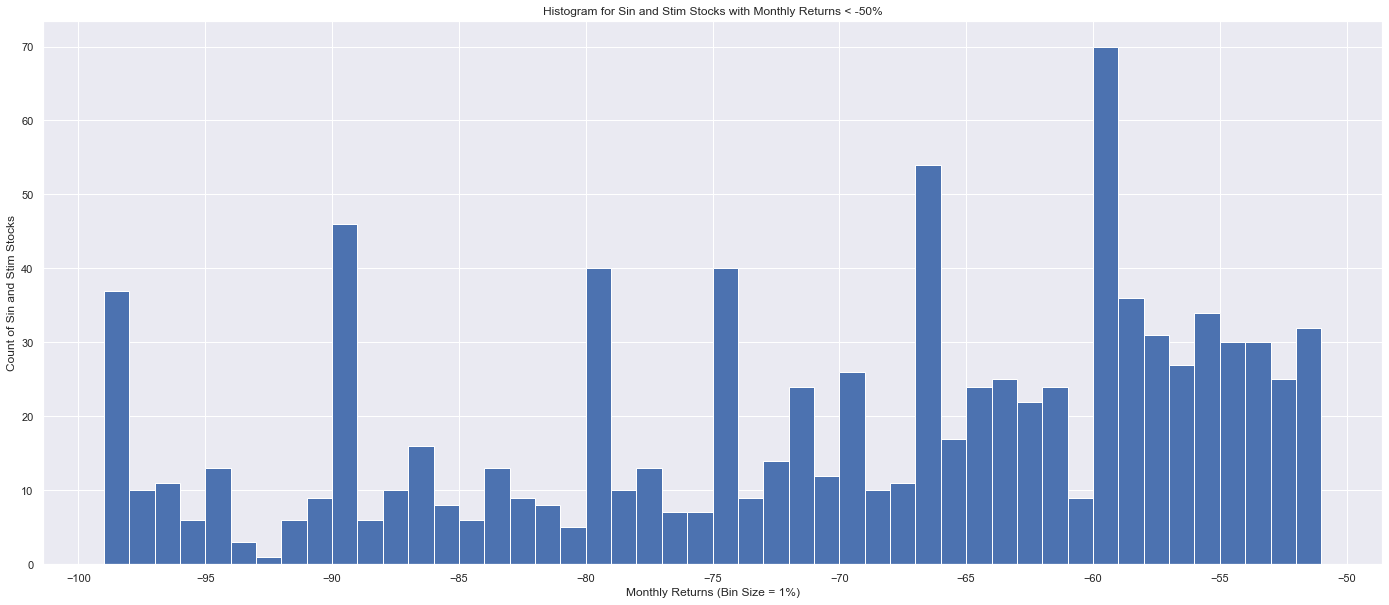

In [274]:
below_neg50 = sin_stim_unfiltered[sin_stim_unfiltered["trt1m"] <= -50]
plt.hist(below_neg50["trt1m"], bins = range(int(below_neg50["trt1m"].min()), int(below_neg50["trt1m"].max()), 1))
plt.title("Histogram for Sin and Stim Stocks with Monthly Returns < -50%")
plt.xlabel("Monthly Returns (Bin Size = 1%)")
plt.ylabel("Count of Sin and Stim Stocks")
plt.xticks([x for x in range(-100, -45, 5)])

([<matplotlib.axis.XTick at 0x16d7187c188>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

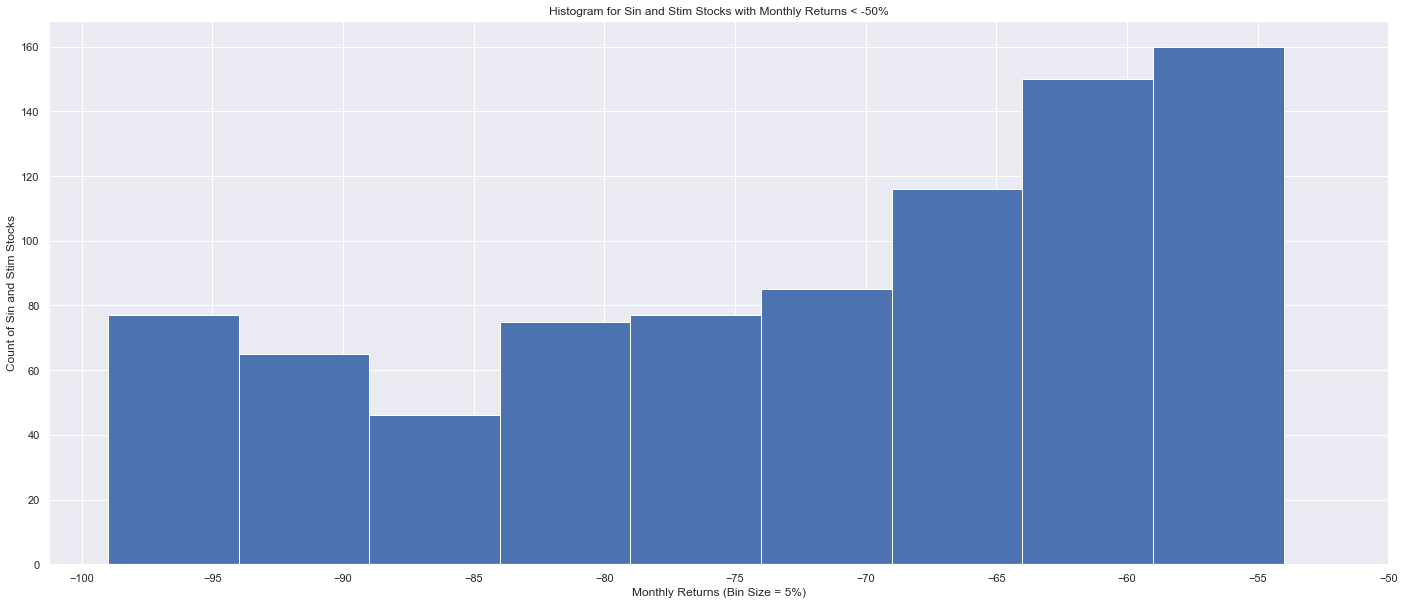

In [275]:
plt.hist(below_neg50["trt1m"], bins = range(int(below_neg50["trt1m"].min()), int(below_neg50["trt1m"].max()), 5))
plt.title("Histogram for Sin and Stim Stocks with Monthly Returns < -50%")
plt.xlabel("Monthly Returns (Bin Size = 5%)")
plt.ylabel("Count of Sin and Stim Stocks")
plt.xticks([x for x in range(-100, -45, 5)])